# K - means clustering

### Imamhussain Naikwade 

In [27]:
#importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
df = pd.read_excel("./OnlineRetail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#droping all categorical variables
df = df.drop(columns = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'])

In [8]:
df.head()

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


In [9]:
df.isna().sum()

Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

In [10]:
#droping all NA Values
df.dropna(how ='any',inplace = True)

In [11]:
df.isna().sum()

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [12]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
retail_scaled = pd.DataFrame(sc.fit_transform(df),columns= ["Quantity","UnitPrice","CustomerID"])

In [13]:
retail_scaled

,Quantity,UnitPrice,CustomerID
0,-0.024373,-0.013135,1.495280
1,-0.024373,-0.001017,1.495280
2,-0.016331,-0.010250,1.495280
3,-0.024373,-0.001017,1.495280
4,-0.024373,-0.001017,1.495280
...,...,...,...
406824,-0.000247,-0.037661,-1.521763
406825,-0.024373,-0.019627,-1.521763
406826,-0.032415,0.009948,-1.521763
406827,-0.032415,0.009948,-1.521763


In [14]:
#reducing the dataset size as it is causing memory issue
retail_scaled = retail_scaled.iloc[0:5000,:]

In [30]:
#Calculating optimal K value using Elbow plot
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(retail_scaled)
    Sum_of_squared_distances.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

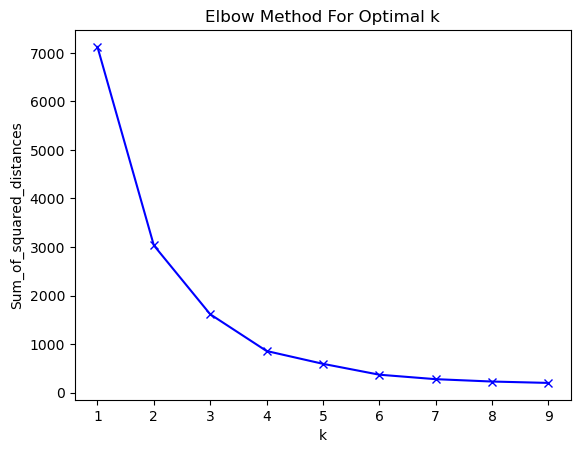

In [31]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
#importing module and applying Clustering to the scaled data
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering( n_clusters = 5, metric = 'euclidean', linkage = 'ward')
agg_clust.fit_predict(retail_scaled)

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

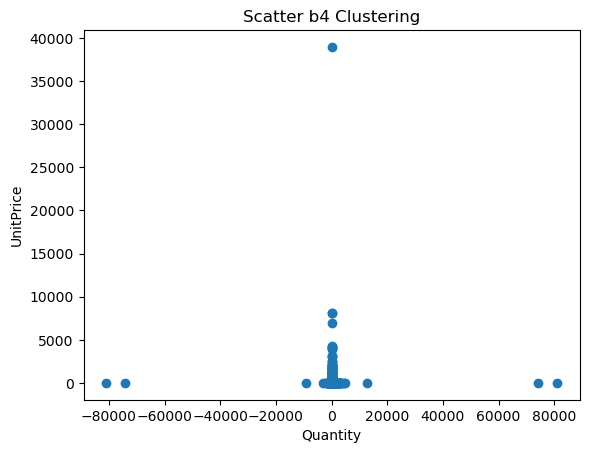

In [33]:
#Before Clustering scatter plot
plt.title("Scatter b4 Clustering")
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

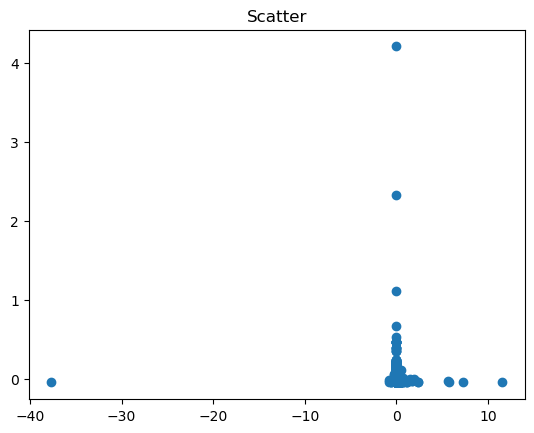

In [34]:
#plotting after clustering
plt.title("Scatter")
plt.scatter(retail_scaled.iloc[:,0],retail_scaled.iloc[:,1])
plt.show()

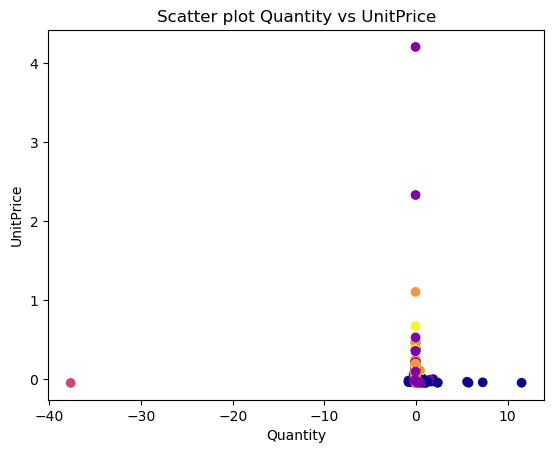

In [35]:
plt.title("Scatter plot Quantity vs UnitPrice")
plt.scatter(retail_scaled.iloc[:,0],retail_scaled.iloc[:,1],c = agg_clust.labels_,cmap = 'plasma')
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

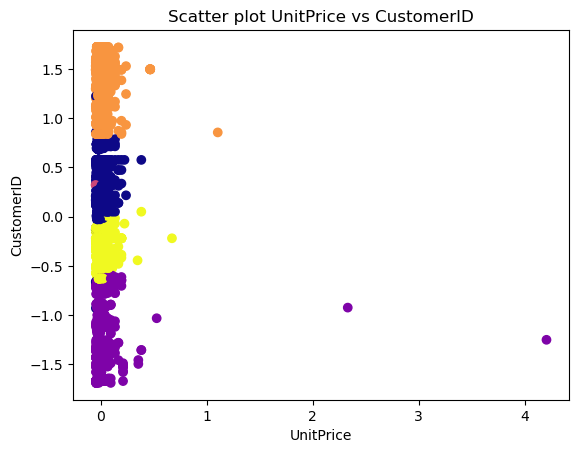

In [36]:
plt.title("Scatter plot UnitPrice vs CustomerID")
plt.scatter(retail_scaled.iloc[:,1],retail_scaled.iloc[:,2],c = agg_clust.labels_,cmap = 'plasma')
plt.xlabel("UnitPrice")
plt.ylabel("CustomerID")
plt.show()

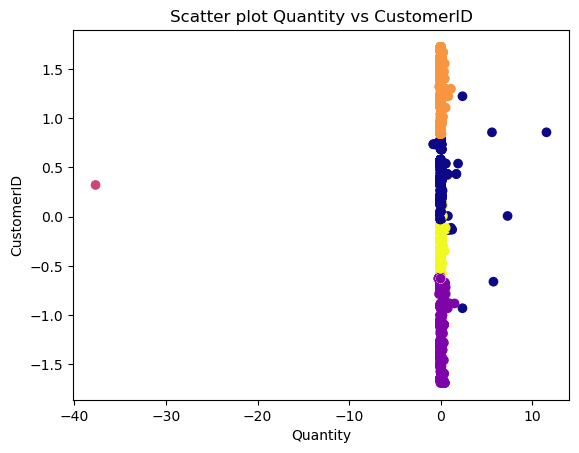

In [37]:
plt.title("Scatter plot Quantity vs CustomerID")
plt.scatter(retail_scaled.iloc[:,0],retail_scaled.iloc[:,2],c = agg_clust.labels_,cmap = 'plasma')
plt.xlabel("Quantity")
plt.ylabel("CustomerID")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


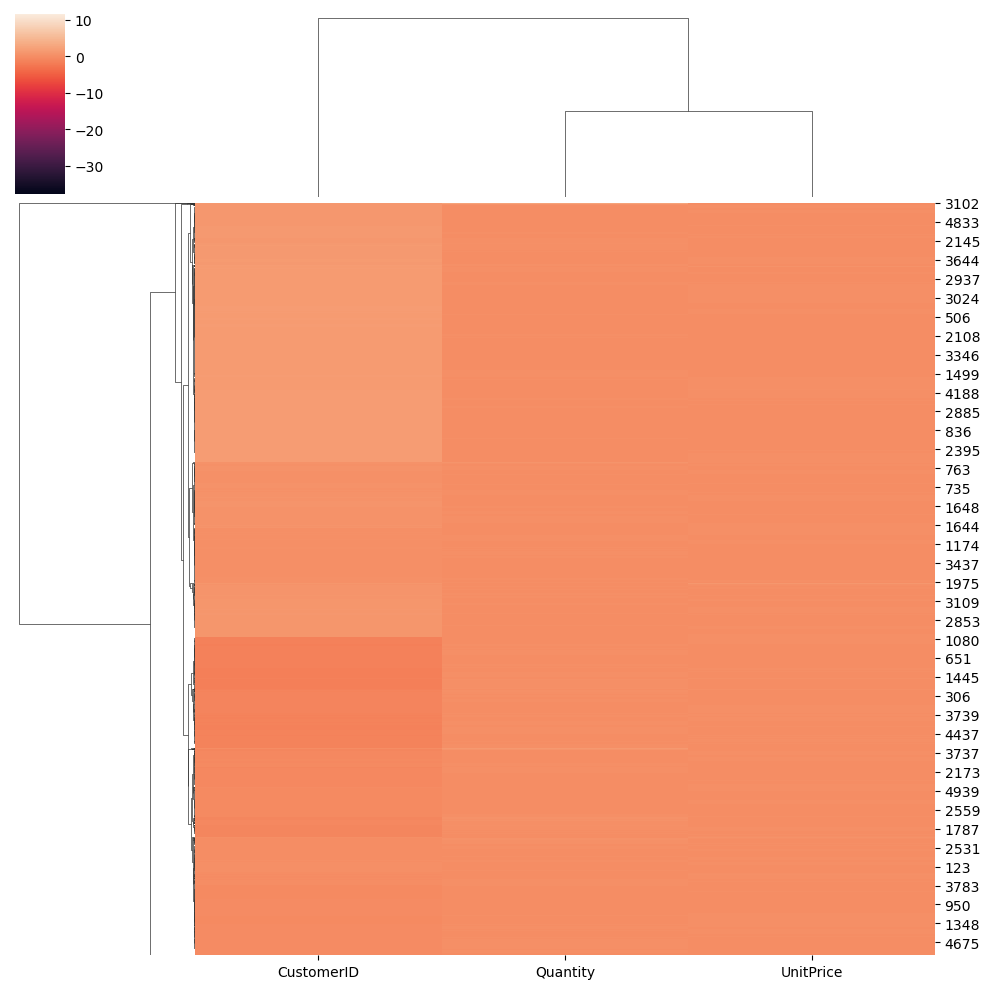

In [23]:
# HeatMap
sns.clustermap(retail_scaled,method ='complete', metric = 'euclidean')

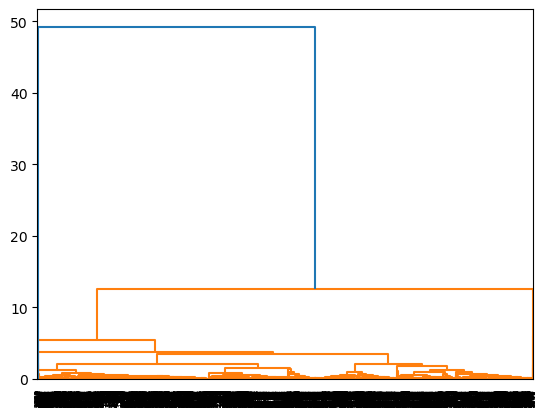

In [26]:
# plotting Dendogram
from scipy.cluster.hierarchy import dendrogram,linkage
ddgram = dendrogram(linkage(retail_scaled, method = 'complete'))
plt.show()